Importing Libraries

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the dataset

In [34]:
df = pd.read_csv("Mall_Customers.csv")

Display the first few rows of the dataset

In [35]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Preprocess the data by scaling the numerical columns

In [36]:
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

Define the features to use for clustering

In [37]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Define the number of clusters (K)

In [38]:
K = 5

Create a KMeans model

In [39]:
kmeans = KMeans(n_clusters=K, random_state=42)

Fit the model to the data

In [40]:
kmeans.fit(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

Get the cluster labels for each customer

In [41]:
labels = kmeans.labels_


Add the cluster labels to the original dataset

In [42]:
df['Cluster'] = labels

Print the cluster centers

In [43]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 1.20484056 -0.23577338 -0.05236781]
 [-0.42880597  0.97484722  1.21608539]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [ 0.07333084  0.97494509 -1.19729675]]


Print the number of customers in each cluster

In [44]:
print("Cluster Sizes:")
print(df['Cluster'].value_counts())

Cluster Sizes:
Cluster
2    54
0    47
1    40
4    39
3    20
Name: count, dtype: int64


Visualize the clusters using a scatter plot

In [45]:
import matplotlib.pyplot as plt

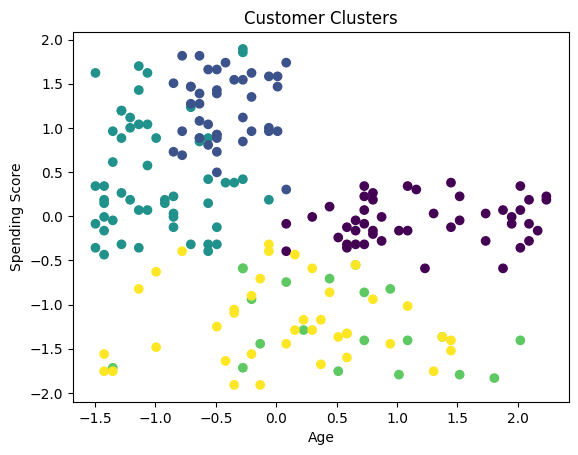

In [46]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.show()